Skeleton Code

In [10]:
import requests
from bs4 import BeautifulSoup
import zipfile
import io
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import time

# Function to download and load dataset
def load_data():
    page_url = 'https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones'
    page_response = requests.get(page_url)
    if page_response.status_code == 200:
        soup = BeautifulSoup(page_response.content, 'html.parser')
        download_link = soup.select_one('a[href$=".zip"]')['href']
        full_download_url = 'https://archive.ics.uci.edu' + download_link
        response = requests.get(full_download_url)
        if response.status_code == 200:
            with zipfile.ZipFile(io.BytesIO(response.content)) as outer_zip:
                inner_zip_name = 'UCI HAR Dataset.zip'
                with outer_zip.open(inner_zip_name) as inner_zip_file:
                    with zipfile.ZipFile(io.BytesIO(inner_zip_file.read())) as inner_zip:
                        with inner_zip.open('UCI HAR Dataset/train/X_train.txt') as myfile:
                            df = pd.read_csv(myfile, delim_whitespace=True, header=None)
                        with inner_zip.open('UCI HAR Dataset/train/y_train.txt') as myfile_y:
                            y = pd.read_csv(myfile_y, delim_whitespace=True, header=None)
    else:
        raise Exception("Failed to download or parse the dataset.")
    return df, y

<ipython-input-10-836ccc4d8ebc>:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(myfile, delim_whitespace=True, header=None)
<ipython-input-10-836ccc4d8ebc>:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv(myfile_y, delim_whitespace=True, header=None)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB
None
        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788

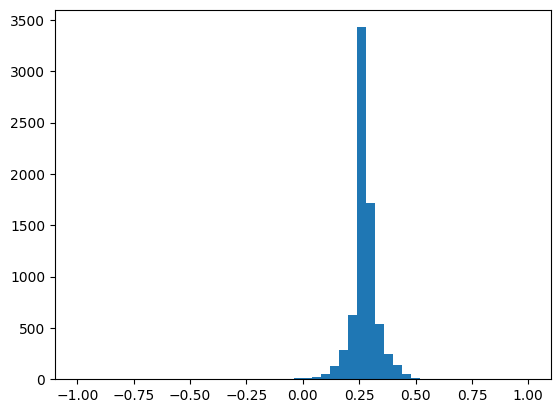

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import numpy as np
import time
# Load dataset
df, y = load_data()

# Display basic information about the DataFrame
print(df.info())

# Display the first few rows of the DataFrame
print(df.head())

# Summary statistics of the numerical features
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Explore the target variable 'y'
print(y.value_counts())

# Correlation matrix (if you want to see relationships between features)
# print(df.corr())

# Example: Look at the distribution of a few features
import matplotlib.pyplot as plt
plt.hist(df[0], bins=50)  # Replace 0 with a column index
plt.show()

In [12]:
# Solution to Task 2: Encode class labels

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y.values.ravel())

In [13]:
# Task 3: Scale the features using StandardScaler
# YOUR CODE HERE: Apply StandardScaler to df

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [14]:
# prompt: # Task 4: Split the data into training and testing sets
# # YOUR CODE HERE: Use train_test_split to split the data
# X_train_full, X_test_full, y_train, y_test = # YOUR CODE HERE

X_train_full, X_test_full, y_train, y_test = train_test_split(df_scaled, encoded_y, test_size=0.2, random_state=42)

In [15]:
# prompt: #TASK 5 - 1. Create a pipeline using Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

# Create a pipeline with Gaussian Naive Bayes
pipeline = Pipeline([
    ('classifier', GaussianNB())
])

# Fit the model to the training data
pipeline.fit(X_train_full, y_train)

# Predict values for the test set
y_pred = pipeline.predict(X_test_full)

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7314751869476547


In [16]:
#TASK 6 - 1. Note the start time before defining the pipeline
#         2. Note the end time and report the difference as the time taken by the model training and inference.

# Note the start time
start_time = time.time()

# Note the end time
end_time = time.time()

# Calculate and print the time taken
time_taken = end_time - start_time
print(f"Time taken: {time_taken:} seconds")

Time taken: 3.9577484130859375e-05 seconds


In [17]:
# TASK 7 - K-Means for dimensionality reduction
n_clusters = 50
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
# Fit KMeans on the training data (transposed)
kmeans.fit(X_train_full.T)  # Transpose to treat features as data points

# Select features based on cluster centers from the training data
selected_features_indices = [np.random.choice(np.where(kmeans.labels_ == i)[0]) for i in range(n_clusters)]
selected_features = X_train_full[:, selected_features_indices]

In [18]:
# prompt: #TASK 8 - Train another model (GaussianNB) on the new dataset, and report time taken and accuracy

# Note the start time
start_time = time.time()

# Create a pipeline with Gaussian Naive Bayes
pipeline = Pipeline([
    ('classifier', GaussianNB())
])

# Fit the model to the training data
pipeline.fit(selected_features, y_train)

# Predict values for the test set
y_pred = pipeline.predict(X_test_full[:, selected_features_indices]) # Use the same selected features for prediction

# Note the end time
end_time = time.time()

# Calculate and print the time taken
time_taken = end_time - start_time
print(f"Time taken: {time_taken} seconds")

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Time taken: 0.008652687072753906 seconds
Accuracy: 0.8062542488103331
